In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
Annual_Gold_Value_In_Euros = pd.read_csv('Resources/Gold_Price_Euro_Conversion(2013-2022).csv')
Inflation_rates_2013_2021 = pd.read_csv('Resources/inflation_rates_2013-2021.csv')
European_inflation = Inflation_rates_2013_2021[Inflation_rates_2013_2021['country'] == 'European Union']

In [8]:
def calculate_percent_change(data, year_column, value_column):
    percent_change = {}
    percent_change[data[year_column].iloc[0]] = 0
    for i in range(1, len(data)):
        old_value = data[value_column].iloc[i - 1]
        new_value = data[value_column].iloc[i]
        print(f"old_value: {old_value}, new_value: {new_value}")
        change = ((new_value - old_value) / old_value) * 100
        percent_change[data[year_column].iloc[i]] = change
    return percent_change

In [9]:
def euro_inflation_creation(data):
    euro_inflation_made = {}
    for i in range(len(data)):
        year = data['year'].iloc[i]
        inflation_rate = data['inflation rate'].iloc[i]
        euro_inflation_made[year] = inflation_rate
    return euro_inflation_made    

{2013: 1.219993423, 2014: 0.199343827, 2015: -0.06164468, 2016: 0.183334861, 2017: 1.429107433, 2018: 1.73860862, 2019: 1.630522608, 2020: 0.476498853, 2021: 2.554506996}
old_value: 1061.169284460932, new_value: 952.7160419903792
old_value: 952.7160419903792, new_value: 1044.1484800037754
old_value: 1044.1484800037754, new_value: 1130.0802166003728
old_value: 1130.0802166003728, new_value: 1116.120355695111
old_value: 1116.120355695111, new_value: 1076.6595614982434
old_value: 1076.6595614982434, new_value: 1248.2040487007366
old_value: 1248.2040487007366, new_value: 1557.743163965801
old_value: 1557.743163965801, new_value: 1521.0833043159707
old_value: 1521.0833043159707, new_value: 1712.8468886239857
{2013: 0, 2014: -10.22016412071769, 2015: 9.597029333355083, 2016: 8.229838786557126, 2017: -1.2352982292936145, 2018: -3.5355321668953534, 2019: 15.933029653661146, 2020: 24.798759112123175, 2021: -2.3533956365758786, 2022: 12.60704024322}
{2013: 1.219993423, 2014: 0.199343827, 2015: -

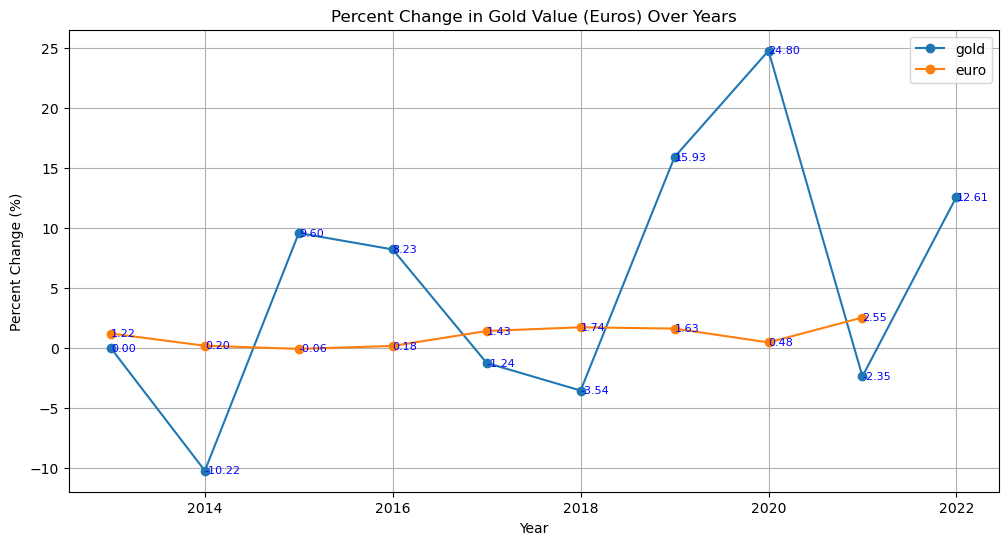

In [10]:
euro_inflation_change = euro_inflation_creation(European_inflation)
print(euro_inflation_change)
percent_change_gold = calculate_percent_change(Annual_Gold_Value_In_Euros, 'Year', 'Gold_Price_Euros')
print(percent_change_gold)
print(euro_inflation_change)
plt.figure(figsize=(12, 6))
plt.plot(percent_change_gold.keys(), percent_change_gold.values(), marker='o', linestyle='-', label='gold')
plt.plot(euro_inflation_change.keys(), euro_inflation_change.values(), marker='o', linestyle='-', label='euro')
for year, rate in percent_change_gold.items():
    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
for year, rate in euro_inflation_change.items():
    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
plt.title('Percent Change in Gold Value (Euros) Over Years')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join('Plotted Charts', 'EuropeanEurosPercentages.png'))
plt.show()